## 0.1 🌐 Connect to Google Colab

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  print("Google Drive connected successfully!")
  import os
  os.chdir('/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project')
except:
  print("Google Drive not connected!")

Mounted at /content/drive
Google Drive connected successfully!


## 0.2 📦 Install Essential Libraries

In [ ]:
# =============================== #
# 📌 Standard Library Imports
# =============================== #
import os
import sys
import glob
import shutil
import time
import datetime
import random
import warnings

# =============================== #
# 📌 Numerical & Data Handling
# =============================== #
import numpy as np
import pandas as pd

# =============================== #
# 📌 Image Processing Libraries
# =============================== #
import cv2
from PIL import Image

# =============================== #
# 📌 Deep Learning & Model Handling
# =============================== #
import tensorflow as tf
import tensorflow.lite as tflite
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ONNX Conversion Libraries
try:
    import onnx
except ImportError:
    print("Installing ONNX...")
    !pip install onnx
    import onnx

try:
    import tf2onnx
except ImportError:
    print("Installing tf2onnx...")
    !pip install tf2onnx
    import tf2onnx

# =============================== #
# 📌 Data Science & Visualization
# =============================== #
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# =============================== #
# 📌 Interactive & Console Utilities
# =============================== #
from IPython.display import display
from rich.console import Console
from rich.table import Table
from rich.progress import track
from rich import print as rprint
from tqdm import tqdm

# =============================== #
# 📌 PyTorch (For additional tasks)
# =============================== #
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# =============================== #
# 📌 Machine Learning Utilities
# =============================== #
from sklearn.model_selection import train_test_split

# =============================== #
# ⚠️ Suppress Warnings
# =============================== #
warnings.filterwarnings("ignore")


Installing ONNX...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 79.8 MB/s eta 0:00:00
Installing tf2onnx...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


##  0.3 🎯 Setup TensorBoard

In [ ]:
def setup_tensorboard(log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))):
    try:
        print("\n📌 Setting up TensorBoard...")
        os.makedirs(log_dir, exist_ok=True)
        print("📊 TensorBoard initialized")
        return tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    except Exception as e:
        print(f"❌ Error setting up TensorBoard: {e}")

In [ ]:
InceptionV3_Writer = setup_tensorboard()


📌 Setting up TensorBoard...
📊 TensorBoard initialized


##  0.4 ⚙️ Setup the device

In [ ]:
def setup_device():
    try:
        device = "GPU" if tf.config.list_physical_devices('GPU') else "CPU"
        print(f"⚙️ Running on: {device}")
        return device
    except Exception as e:
        print(f"❌ Error setting up device: {e}")


In [ ]:
device = setup_device()

⚙️ Running on: CPU


In [ ]:
def copy_files_from_drive_to_current_dir(drive_helper_file_path: str, drive_go_modular_dir_path: str, current_dir: str):
    """
    This function copies specified files and directories from Google Drive to the current working directory.

    Args:
    - drive_helper_file_path: The full path to the helper_functions.py file on Google Drive.
    - drive_go_modular_dir_path: The full path to the 'going_modular' directory on Google Drive.
    - current_dir: The current working directory where files should be copied to.

    Returns:
    - None
    """
    try:
        # Copy the helper_functions.py file from Drive to the current directory
        print(f"Copying helper_functions.py from {drive_helper_file_path} to {current_dir}")
        shutil.copy(drive_helper_file_path, current_dir)
        print("helper_functions.py copied successfully.")

        # Check if the 'going_modular' directory exists in the target directory
        target_go_modular_dir = os.path.join(current_dir, 'going_modular')
        if os.path.exists(target_go_modular_dir):
            print(f"Directory {target_go_modular_dir} already exists. Renaming it to avoid conflicts.")
            # Rename the existing directory to avoid overwriting it
            os.rename(target_go_modular_dir, target_go_modular_dir + '_backup')
            print(f"Renamed existing 'going_modular' directory to {target_go_modular_dir}_backup")

        # Copy all files and subdirectories from going_modular to the current directory
        print(f"Copying files from {drive_go_modular_dir_path} to {current_dir}")
        shutil.copytree(drive_go_modular_dir_path, target_go_modular_dir)
        print("Going modular files copied successfully.")

    except Exception as e:
        print(f"An error occurred while copying files: {e}")

In [ ]:
# Define the paths
drive_helper_file_path = '/content/drive/MyDrive/Machine&Deep_LearningProjects/Computer Vision/02-Animal_Classifications/helper_functions.py'
drive_go_modular_dir_path = '/content/drive/MyDrive/Machine&Deep_LearningProjects/Computer Vision/02-Animal_Classifications/going_modular'
# Get current_dir
current_dir = os.getcwd()

# Call the function
copy_files_from_drive_to_current_dir(drive_helper_file_path, drive_go_modular_dir_path, current_dir)

# Verify if helper_functions.py exist
helper_function_path = os.path.join(os.getcwd(), 'helper_functions.py')
if os.path.exists(helper_function_path):
    print("helper_functions.py found in the current directory.")
else:
    print("helper_functions.py not found. Please check the file path.")

Copying helper_functions.py from /content/drive/MyDrive/Machine&Deep_LearningProjects/Computer Vision/02-Animal_Classifications/helper_functions.py to /content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project
helper_functions.py copied successfully.
Copying files from /content/drive/MyDrive/Machine&Deep_LearningProjects/Computer Vision/02-Animal_Classifications/going_modular to /content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project
Going modular files copied successfully.
helper_functions.py found in the current directory.


In [ ]:
# Add the current directory to sys.path to ensure Python can find the helper_functions module
sys.path.append(os.getcwd())

In [ ]:
from going_modular.going_modular import utils, model_builder, data_setup, engine, predictions
from  helper_functions import set_seeds, plot_loss_curves, walk_through_dir, pred_and_plot_image

In [ ]:
# ✅ Define Directories
RAW_DATA_PATH = "data/raw/"
PROCESSED_DATA_PATH = "data/processed/"

# ✅ Create processed data directory if not exists
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

# ✅ Load Face Detection Model
# 📝 Model structure file
prototxt_path  = "/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/models/deploy.prototxt"
# 🏋️‍♂️ Pre-trained model file
model_path  = "/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/models/res10_300x300_ssd_iter_140000.caffemodel"

In [ ]:
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

# Verify successful loading
if net.empty():
    print("❌ Error: Failed to load the face detection model.")
else:
    print("✅ Face detection model loaded successfully!")

✅ Face detection model loaded successfully!


In [ ]:
walk_through_dir(RAW_DATA_PATH)

There are 105 directories and 0 images in 'data/raw/'.
There are 0 directories and 225 images in 'data/raw/pins_Alexandra Daddario'.
There are 0 directories and 213 images in 'data/raw/pins_Adriana Lima'.
There are 0 directories and 152 images in 'data/raw/pins_Alex Lawther'.
There are 0 directories and 211 images in 'data/raw/pins_alycia dabnem carey'.
There are 0 directories and 218 images in 'data/raw/pins_amber heard'.
There are 0 directories and 203 images in 'data/raw/pins_Anne Hathaway'.
There are 0 directories and 196 images in 'data/raw/pins_Andy Samberg'.
There are 0 directories and 139 images in 'data/raw/pins_Alvaro Morte'.
There are 0 directories and 124 images in 'data/raw/pins_Anthony Mackie'.
There are 0 directories and 117 images in 'data/raw/pins_Amanda Crew'.
There are 0 directories and 138 images in 'data/raw/pins_Bobby Morley'.
There are 0 directories and 102 images in 'data/raw/pins_Brian J. Smith'.
There are 0 directories and 162 images in 'data/raw/pins_Avril La

**Part 1: Face Detection and Dataset Preprocessing**
  * 1.1 Face Detection
    * Utilize OpenCV's DNN module for face detection.
    * Pre-trained face detection model files (.prototxt and .caffemodel) are required.
    * Confidence threshold set to 0.5.
    * Support for multiple face detections in an image.
  * 1.2 Dataset Preprocessing
    * Load the LFW dataset for face recognition.
    * Convert grayscale images to RGB and resize them to (299, 299) for compatibility with InceptionV3.
    * Normalize pixel values for consistent input processing.
    * Split the dataset into training (80%), validation (20% of training), and test (20%) sets.
    * Implement data augmentation techniques: rotation, width/height shifts, and horizontal flips.

This images has been collected from Pinterest and cropped. There are 105 celebrities and 17534 faces.

# **1. Get Insights on Our Data**

In [ ]:
console = Console()

In [ ]:
def count_images_and_celebrities(Path:str =RAW_DATA_PATH ):
    """Counts the number of images and celebrities in the dataset."""
    try:
        # Get list of celebrity folders
        celebrity_folders = [f for f in os.listdir(Path) if os.path.isdir(os.path.join(Path, f))]
        num_celebrities = len(celebrity_folders)

        # Count total number of images
        num_images = sum([len(os.listdir(os.path.join(Path, celeb))) for celeb in celebrity_folders])

        # ✅ Print dataset summary in a cool way
        console.rule("[bold cyan]📊 Dataset Overview[/bold cyan]")
        console.print(f"📸 [bold green]Total Images:[/bold green] {num_images}", style="bold yellow")
        console.print(f"🌟 [bold blue]Total Celebrities:[/bold blue] {num_celebrities}", style="bold magenta")

        return celebrity_folders, num_celebrities, num_images

    except Exception as e:
        console.print(f"[red]❌ Error Counting Images:[/red] {str(e)}")
        return [], 0, 0

In [ ]:
celebrity_folders_before, num_celebrities_before, num_images_before = count_images_and_celebrities(RAW_DATA_PATH)

─────────────────────────────────────────────── 📊 Dataset Overview ───────────────────────────────────────────────

📸 Total Images: 17534

🌟 Total Celebrities: 105

In [ ]:
def create_celeb_dataframe(celebrity_folders,Path:str =RAW_DATA_PATH ):
    """Creates a DataFrame with celebrity names and their image counts."""
    celeb_data = {"Celebrity": [], "Image_Count": []}

    for celeb in track(celebrity_folders, description="📊 Processing Images"):
        celeb_path = os.path.join(Path, celeb)
        num_photos = len(os.listdir(celeb_path))
        celeb_data["Celebrity"].append(celeb)
        celeb_data["Image_Count"].append(num_photos)

    df = pd.DataFrame(celeb_data).sort_values(by="Image_Count", ascending=False)

    # ✅ Print dataset summary table
    table = Table(title="📸 Celebrity Image Count", show_lines=True)
    table.add_column("Celebrity", style="cyan", justify="left")
    table.add_column("Image Count", style="green", justify="right")

    for _, row in df.iterrows():
        table.add_row(row["Celebrity"], str(row["Image_Count"]))

    console.print(table)

    return df

In [ ]:
df_before = create_celeb_dataframe(celebrity_folders_before)

Output()

          📸 Celebrity Image Count           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Celebrity                   ┃ Image Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ pins_Leonardo DiCaprio      │         237 │
├─────────────────────────────┼─────────────┤
│ pins_Robert Downey Jr       │         233 │
├─────────────────────────────┼─────────────┤
│ pins_Katherine Langford     │         226 │
├─────────────────────────────┼─────────────┤
│ pins_Alexandra Daddario     │         225 │
├─────────────────────────────┼─────────────┤
│ pins_margot robbie          │         221 │
├─────────────────────────────┼─────────────┤
│ pins_elizabeth olsen        │         221 │
├─────────────────────────────┼─────────────┤
│ pins_amber heard            │         218 │
├─────────────────────────────┼─────────────┤
│ pins_Adriana Lima           │         213 │
├─────────────────────────────┼─────────────┤
│ pins_Logan Lerman           │         212 │
├─────────────────────────────┼─────────────┤
│ pins_alycia dabnem carey    │         211 │
├─────────────────────────────┼─────────────┤
│ pins_Emma Watson            │         211 │
├─────────────────────────────┼─────────────┤
│ pins_Emilia Clarke          │         210 │
├─────────────────────────────┼─────────────┤
│ pins_Brenton Thwaites       │         209 │
├─────────────────────────────┼─────────────┤
│ pins_Megan Fox              │         209 │
├─────────────────────────────┼─────────────┤
│ pins_Sophie Turner          │         204 │
├─────────────────────────────┼─────────────┤
│ pins_Anne Hathaway          │         203 │
├─────────────────────────────┼─────────────┤
│ pins_kiernen shipka         │         203 │
├─────────────────────────────┼─────────────┤
│ pins_scarlett johansson     │         201 │
├─────────────────────────────┼─────────────┤
│ pins_gal gadot              │         199 │
├─────────────────────────────┼─────────────┤
│ pins_Natalie Dormer         │         198 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hardy              │         198 │
├─────────────────────────────┼─────────────┤
│ pins_barbara palvin         │         197 │
├─────────────────────────────┼─────────────┤
│ pins_Andy Samberg           │         196 │
├─────────────────────────────┼─────────────┤
│ pins_Henry Cavil            │         195 │
├─────────────────────────────┼─────────────┤
│ pins_Maisie Williams        │         193 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Cruise             │         192 │
├─────────────────────────────┼─────────────┤
│ pins_Madelaine Petsch       │         192 │
├─────────────────────────────┼─────────────┤
│ pins_Millie Bobby Brown     │         191 │
├─────────────────────────────┼─────────────┤
│ pins_Zac Efron              │         191 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Holland            │         189 │
├─────────────────────────────┼─────────────┤
│ pins_ellen page             │         188 │
├─────────────────────────────┼─────────────┤
│ pins_Gwyneth Paltrow        │         187 │
├─────────────────────────────┼─────────────┤
│ pins_Selena Gomez           │         186 │
├─────────────────────────────┼─────────────┤
│ pins_Zoe Saldana            │         186 │
├─────────────────────────────┼─────────────┤
│ pins_Jason Momoa            │         184 │
├─────────────────────────────┼─────────────┤
│ pins_grant gustin           │         183 │
├─────────────────────────────┼─────────────┤
│ pins_Johnny Depp            │         182 │
├─────────────────────────────┼─────────────┤
│ pins_Danielle Panabaker     │         181 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hiddleston         │         181 │
├─────────────────────────────┼─────────────┤
│ pins_tom ellis              │         180 │
├─────────────────────────────┼─────────────┤
│ pins_Jennifer Lawrence      │         180 │
├─────────────────────────────┼─────────────┤
│ pins_Hugh Jackman           │         179 │

In [ ]:
def create_filtered_celeb_dataframe(celebrity_folders, min_images=10):
    """Creates a DataFrame with celebrity names and their image counts, filtering out low-count celebrities."""
    celeb_data = {"Celebrity": [], "Image_Count": []}

    for celeb in track(celebrity_folders, description="📊 Processing Images"):
        celeb_path = os.path.join(RAW_DATA_PATH, celeb)
        num_photos = len(os.listdir(celeb_path))
        celeb_data["Celebrity"].append(celeb)
        celeb_data["Image_Count"].append(num_photos)

    df = pd.DataFrame(celeb_data).sort_values(by="Image_Count", ascending=False)

    # 🔥 Print stylish summary BEFORE filtering
    console.rule("[bold yellow]📸 STEP 2: CELEBRITY IMAGE DISTRIBUTION (Before Filtering) 📸[/bold yellow]")
    console.print(df.describe(), style="bold green")

    # ✅ Filter out celebrities with too few images
    df_filtered = df[df["Image_Count"] >= min_images].reset_index(drop=True)

    # 🔥 Print stylish summary AFTER filtering
    console.rule("[bold red]🛑 STEP 3: FILTERING LOW-COUNT CELEBRITIES 🛑[/bold red]")
    console.print(f"🚀 Celebrities with at least {min_images} images: {df_filtered.shape[0]}", style="bold cyan")

    return df_filtered


In [ ]:
# ✅ Call function
MIN_IMAGES_PER_CELEB = 10
df_filtered = create_filtered_celeb_dataframe(celebrity_folders_before,min_images=MIN_IMAGES_PER_CELEB)

Output()

────────────────────────── 📸 STEP 2: CELEBRITY IMAGE DISTRIBUTION (Before Filtering) 📸 ──────────────────────────

       Image_Count
count   105.000000
mean    166.990476
std      34.128855
min      86.000000
25%     141.000000
50%     169.000000
75%     192.000000
max     237.000000

────────────────────────────────── 🛑 STEP 3: FILTERING LOW-COUNT CELEBRITIES 🛑 ──────────────────────────────────

🚀 Celebrities with at least 10 images: 105

In [ ]:
df_filtered

,Celebrity,Image_Count
0,pins_Leonardo DiCaprio,237
1,pins_Robert Downey Jr,233
2,pins_Katherine Langford,226
3,pins_Alexandra Daddario,225
4,pins_elizabeth olsen,221
...,...,...
100,pins_Morgan Freeman,105
101,pins_Brian J. Smith,102
102,pins_Cristiano Ronaldo,98
103,pins_Mark Zuckerberg,95


In [ ]:
# Save the dataframe to excel file


In [ ]:
def plot_top_celebrities(df, top_n=15):
    """Creates an interactive bar chart using Plotly."""
    top_df = df.head(top_n)

    fig = px.bar(
        top_df,
        x="Image_Count",
        y="Celebrity",
        text="Image_Count",
        orientation="h",
        title="🌟 Top 15 Celebrities with Most Images 🌟",
        color="Image_Count",
        color_continuous_scale="sunsetdark",
        template="plotly_dark"
    )

    fig.update_layout(
        title_font=dict(size=24, color="yellow", family="Arial"),
        xaxis_title="Number of Images",
        yaxis_title="Celebrity Name",
        title_x=0.5,  # Centering title
        height=600
    )

    fig.update_traces(
        textfont_size=14,
        textangle=0,
        textposition="outside",
        cliponaxis=False
    )

    fig.show()


In [ ]:
# ✅ Call function
plot_top_celebrities(df_before)

In [ ]:
def show_random_images(num_images=5):
    """Displays random images from the dataset with celebrity names."""
    selected_celebs = random.sample(celebrity_folders_before, min(num_images, len(celebrity_folders_before)))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, celeb in enumerate(selected_celebs):
        celeb_folder = os.path.join(RAW_DATA_PATH, celeb)
        celeb_images = os.listdir(celeb_folder)

        if not celeb_images:
            continue

        img_path = os.path.join(celeb_folder, random.choice(celeb_images))
        image = Image.open(img_path)

        # Display image
        axes[i].imshow(image)
        axes[i].set_title(f"🌟 {celeb}", fontsize=12, fontweight="bold", color="white")
        axes[i].axis("off")

    fig.patch.set_facecolor('#212529')

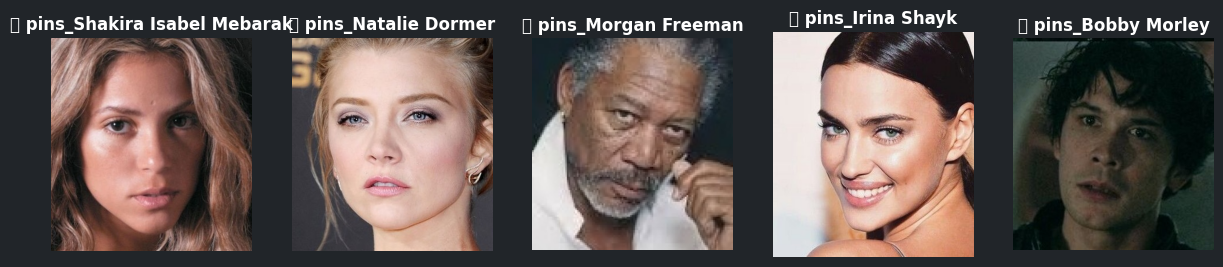

In [ ]:
show_random_images(5)

# **Part 1: Face Detection and Dataset Preprocessing**

## **1.1 Face Detection**

In [ ]:
class FaceDetector:
    """ 🚀 Face Detection & Preprocessing Pipeline using OpenCV's DNN module. """

    def __init__(self, prototxt_path, model_path, confidence_threshold=0.5):
        """Initialize the FaceDetector with model paths and confidence threshold."""
        print("\n" + "="*50)
        print("🎯 Face Detection Model Initialization 🎯".center(50))
        print("="*50)

        try:
            if not os.path.exists(prototxt_path) or not os.path.exists(model_path):
                raise FileNotFoundError("❌ Model files not found! Check the paths.")

            self.model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)
            print("📝 Model structure file loaded Successfully")
            print("🏋️‍♂️ Pre-trained model file loaded Successfully")
            self.confidence_threshold = confidence_threshold
            print("✅ Face Detection Model Loaded Successfully! 🚀\n")
        except Exception as e:
            print(f"⚠️ Error loading model: {e}\n")

    def detect_faces(self, image):
        """ Detect faces in an image using OpenCV DNN model. """
        try:
            h, w = image.shape[:2]
            blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(300, 300),
                                         mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
            self.model.setInput(blob)
            detections = self.model.forward()

            faces = []
            for i in range(detections.shape[2]):
                confidence = detections[0, 0, i, 2]
                if confidence > self.confidence_threshold:
                    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (x, y, x_max, y_max) = box.astype("int")
                    x, y = max(0, x), max(0, y)
                    x_max, y_max = min(w, x_max), min(h, y_max)

                    if x_max > x and y_max > y:
                        face = image[y:y_max, x:x_max]
                        faces.append(face)

            return faces
        except Exception as e:
            print(f"⚠️ Error detecting faces: {e}")
            return []

    def preprocess_image(self, image):
        """ Convert image to RGB, resize, and normalize. """
        try:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = cv2.resize(image, (299, 299))
            image = image.astype("float32") / 255.0  # Normalize
            return image
        except Exception as e:
            print(f"⚠️ Error in preprocessing image: {e}")
            return None

    def augment_image(self, image):
        """ Apply data augmentation to the image. """
        try:
            datagen = ImageDataGenerator(rotation_range=30,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True)
            image = np.expand_dims(image, axis=0)
            augmented_image = next(datagen.flow(image, batch_size=1))[0]
            return augmented_image
        except Exception as e:
            print(f"⚠️ Error in image augmentation: {e}")
            return None

    def process_and_save_faces(self, image_path, save_path, show=False):
        """ Detect faces, preprocess, augment, and save them while visualizing the results. """
        try:
            if not os.path.exists(image_path):
                print(f"❌ Image not found: {image_path}")
                return

            image = cv2.imread(image_path)
            faces = self.detect_faces(image)

            if not faces:
                print("⚠️ No faces detected in image.")
                return

            os.makedirs(save_path, exist_ok=True)

            base_name = os.path.splitext(os.path.basename(image_path))[0]

            for i, face in enumerate(faces):
                processed_face = self.preprocess_image(face)
                augmented_face = self.augment_image(processed_face)

                if processed_face is not None:
                    save_name = f"{save_path}/{base_name}_processed_{i}.png"
                    processed_bgr = cv2.cvtColor((processed_face * 255).astype("uint8"), cv2.COLOR_RGB2BGR)
                    cv2.imwrite(save_name, processed_bgr)

                if augmented_face is not None:
                    save_name_aug = f"{save_path}/{base_name}_augmented_{i}.png"
                    augmented_bgr = cv2.cvtColor((augmented_face * 255).astype("uint8"), cv2.COLOR_RGB2BGR)
                    cv2.imwrite(save_name_aug, augmented_bgr)

                if show:
                    # Plot the images side by side
                    fig, axes = plt.subplots(1, 3, figsize=(8, 4))
                    fig.suptitle("🎭 Image Processing Pipeline", fontsize=16)
                    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    axes[0].set_title("Original Image")
                    axes[0].axis("off")

                    axes[1].imshow(processed_face)
                    axes[1].set_title("Preprocessed Face")
                    axes[1].axis("off")

                    axes[2].imshow(augmented_face)
                    axes[2].set_title("Augmented Face")
                    axes[2].axis("off")

                    plt.show()

        except Exception as e:
            print(f"⚠️ Error in processing and saving faces: {e}")

    def process_dataset(self, dataset_path, processed_path, show=False):
        """ Iterate over celebrity folders, process images, and save results with progress tracking. """
        try:
            if not os.path.exists(dataset_path):
                print("❌ Dataset path does not exist!")
                return

            celebrities = [c for c in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, c))]
            for celebrity in celebrities:
                celebrity_folder = os.path.join(dataset_path, celebrity)
                save_celebrity_path = os.path.join(processed_path, celebrity)
                os.makedirs(save_celebrity_path, exist_ok=True)

                images = os.listdir(celebrity_folder)

                progress_bar = tqdm(total=len(images), desc=f"🚀 Processing {celebrity}", unit="image", leave=True, dynamic_ncols=True)

                for image_name in images:
                    image_path = os.path.join(celebrity_folder, image_name)
                    self.process_and_save_faces(image_path, save_celebrity_path, show=show)
                    progress_bar.update(1)

                progress_bar.close()

                saved_files = len(os.listdir(save_celebrity_path))
                print(f"🎉 Completed processing {celebrity}! Saved {saved_files} images. ✨")

        except Exception as e:
            print(f"⚠️ Error in processing dataset: {e}")

In [ ]:
# ✅ Initialize Face Detector
detector = FaceDetector(prototxt_path, model_path)


     🎯 Face Detection Model Initialization 🎯      
📝 Model structure file loaded Successfully
🏋️‍♂️ Pre-trained model file loaded Successfully
✅ Face Detection Model Loaded Successfully! 🚀



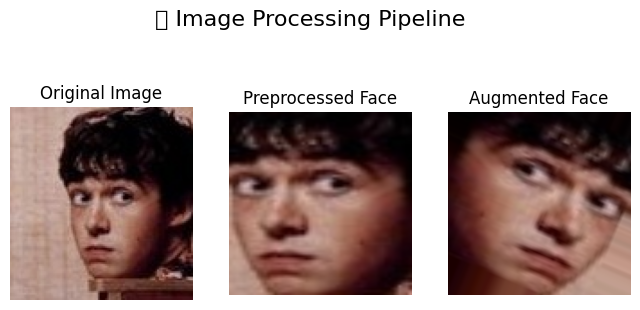

In [ ]:
# Test Our model
image_path = "/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/raw/pins_Alex Lawther/Alex Lawther174_57.jpg"
save_path = "/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/processed"

detector.process_and_save_faces(image_path, save_path,show = True)

## **1.2 Dataset Preprocessing**

In [ ]:
detector.process_dataset(RAW_DATA_PATH, PROCESSED_DATA_PATH, show=False)

🚀 Processing pins_Alexandra Daddario: 100%|██████████| 225/225 [00:25<00:00,  8.68image/s]


🎉 Completed processing pins_Alexandra Daddario! Saved 450 images. ✨


🚀 Processing pins_Adriana Lima: 100%|██████████| 213/213 [00:25<00:00,  8.31image/s]


🎉 Completed processing pins_Adriana Lima! Saved 426 images. ✨


🚀 Processing pins_Alex Lawther: 100%|██████████| 152/152 [00:19<00:00,  7.75image/s]


🎉 Completed processing pins_Alex Lawther! Saved 304 images. ✨


🚀 Processing pins_alycia dabnem carey: 100%|██████████| 211/211 [00:26<00:00,  7.85image/s]


🎉 Completed processing pins_alycia dabnem carey! Saved 424 images. ✨


🚀 Processing pins_amber heard: 100%|██████████| 218/218 [00:26<00:00,  8.16image/s]


🎉 Completed processing pins_amber heard! Saved 436 images. ✨


🚀 Processing pins_Anne Hathaway: 100%|██████████| 203/203 [00:25<00:00,  8.00image/s]


🎉 Completed processing pins_Anne Hathaway! Saved 406 images. ✨


🚀 Processing pins_Andy Samberg: 100%|██████████| 196/196 [00:24<00:00,  7.96image/s]


🎉 Completed processing pins_Andy Samberg! Saved 398 images. ✨


🚀 Processing pins_Alvaro Morte: 100%|██████████| 139/139 [00:17<00:00,  7.98image/s]


🎉 Completed processing pins_Alvaro Morte! Saved 280 images. ✨


🚀 Processing pins_Anthony Mackie: 100%|██████████| 124/124 [00:15<00:00,  8.22image/s]


🎉 Completed processing pins_Anthony Mackie! Saved 252 images. ✨


🚀 Processing pins_Amanda Crew: 100%|██████████| 117/117 [00:15<00:00,  7.36image/s]


🎉 Completed processing pins_Amanda Crew! Saved 234 images. ✨


🚀 Processing pins_Bobby Morley: 100%|██████████| 138/138 [00:16<00:00,  8.41image/s]


🎉 Completed processing pins_Bobby Morley! Saved 278 images. ✨


🚀 Processing pins_Brian J. Smith: 100%|██████████| 102/102 [00:13<00:00,  7.58image/s]


🎉 Completed processing pins_Brian J. Smith! Saved 204 images. ✨


🚀 Processing pins_Avril Lavigne: 100%|██████████| 162/162 [00:19<00:00,  8.51image/s]


🎉 Completed processing pins_Avril Lavigne! Saved 324 images. ✨


🚀 Processing pins_Ben Affleck: 100%|██████████| 126/126 [00:16<00:00,  7.72image/s]


🎉 Completed processing pins_Ben Affleck! Saved 252 images. ✨


🚀 Processing pins_Brie Larson: 100%|██████████| 169/169 [00:21<00:00,  7.87image/s]


🎉 Completed processing pins_Brie Larson! Saved 340 images. ✨


🚀 Processing pins_camila mendes: 100%|██████████| 162/162 [00:19<00:00,  8.38image/s]


🎉 Completed processing pins_camila mendes! Saved 328 images. ✨


🚀 Processing pins_barack obama: 100%|██████████| 119/119 [00:14<00:00,  8.27image/s]


🎉 Completed processing pins_barack obama! Saved 238 images. ✨


🚀 Processing pins_Brenton Thwaites: 100%|██████████| 209/209 [00:27<00:00,  7.59image/s]


🎉 Completed processing pins_Brenton Thwaites! Saved 418 images. ✨


🚀 Processing pins_Bill Gates: 100%|██████████| 122/122 [00:15<00:00,  8.13image/s]


🎉 Completed processing pins_Bill Gates! Saved 246 images. ✨


🚀 Processing pins_barbara palvin: 100%|██████████| 197/197 [00:25<00:00,  7.63image/s]


🎉 Completed processing pins_barbara palvin! Saved 398 images. ✨


🚀 Processing pins_Chris Evans: 100%|██████████| 166/166 [00:19<00:00,  8.50image/s]


🎉 Completed processing pins_Chris Evans! Saved 336 images. ✨


🚀 Processing pins_Elizabeth Lail: 100%|██████████| 158/158 [00:19<00:00,  8.22image/s]


🎉 Completed processing pins_Elizabeth Lail! Saved 316 images. ✨


🚀 Processing pins_Dominic Purcell: 100%|██████████| 146/146 [00:19<00:00,  7.68image/s]


🎉 Completed processing pins_Dominic Purcell! Saved 292 images. ✨


🚀 Processing pins_Dwayne Johnson: 100%|██████████| 141/141 [00:17<00:00,  7.94image/s]


🎉 Completed processing pins_Dwayne Johnson! Saved 282 images. ✨


🚀 Processing pins_Christian Bale: 100%|██████████| 154/154 [00:18<00:00,  8.54image/s]


🎉 Completed processing pins_Christian Bale! Saved 308 images. ✨


🚀 Processing pins_Danielle Panabaker: 100%|██████████| 181/181 [00:24<00:00,  7.29image/s]


🎉 Completed processing pins_Danielle Panabaker! Saved 362 images. ✨


🚀 Processing pins_Cristiano Ronaldo: 100%|██████████| 98/98 [00:43<00:00,  2.28image/s]


🎉 Completed processing pins_Cristiano Ronaldo! Saved 200 images. ✨


🚀 Processing pins_Eliza Taylor: 100%|██████████| 162/162 [00:19<00:00,  8.15image/s]


🎉 Completed processing pins_Eliza Taylor! Saved 324 images. ✨


🚀 Processing pins_Chris Hemsworth: 100%|██████████| 159/159 [00:19<00:00,  8.25image/s]


🎉 Completed processing pins_Chris Hemsworth! Saved 320 images. ✨


🚀 Processing pins_Chris Pratt: 100%|██████████| 176/176 [00:21<00:00,  8.22image/s]


🎉 Completed processing pins_Chris Pratt! Saved 352 images. ✨


🚀 Processing pins_elon musk: 100%|██████████| 135/135 [00:18<00:00,  7.49image/s]


🎉 Completed processing pins_elon musk! Saved 272 images. ✨


🚀 Processing pins_Emilia Clarke: 100%|██████████| 210/210 [00:24<00:00,  8.71image/s]


🎉 Completed processing pins_Emilia Clarke! Saved 420 images. ✨


🚀 Processing pins_elizabeth olsen: 100%|██████████| 221/221 [00:28<00:00,  7.83image/s]


🎉 Completed processing pins_elizabeth olsen! Saved 444 images. ✨


🚀 Processing pins_Emma Watson: 100%|██████████| 211/211 [00:27<00:00,  7.72image/s]


🎉 Completed processing pins_Emma Watson! Saved 424 images. ✨


🚀 Processing pins_Henry Cavil: 100%|██████████| 195/195 [00:24<00:00,  7.83image/s]


🎉 Completed processing pins_Henry Cavil! Saved 394 images. ✨


🚀 Processing pins_ellen page: 100%|██████████| 188/188 [00:21<00:00,  8.59image/s]


🎉 Completed processing pins_ellen page! Saved 376 images. ✨


🚀 Processing pins_Emma Stone: 100%|██████████| 139/139 [00:17<00:00,  8.14image/s]


🎉 Completed processing pins_Emma Stone! Saved 278 images. ✨


🚀 Processing pins_gal gadot: 100%|██████████| 199/199 [00:25<00:00,  7.83image/s]


🎉 Completed processing pins_gal gadot! Saved 398 images. ✨


🚀 Processing pins_Gwyneth Paltrow: 100%|██████████| 187/187 [00:23<00:00,  8.05image/s]


🎉 Completed processing pins_Gwyneth Paltrow! Saved 374 images. ✨


🚀 Processing pins_grant gustin: 100%|██████████| 183/183 [00:21<00:00,  8.34image/s]


🎉 Completed processing pins_grant gustin! Saved 368 images. ✨


🚀 Processing pins_Jessica Barden: 100%|██████████| 141/141 [00:17<00:00,  8.22image/s]


🎉 Completed processing pins_Jessica Barden! Saved 282 images. ✨


🚀 Processing pins_Jeremy Renner: 100%|██████████| 167/167 [00:20<00:00,  8.20image/s]


🎉 Completed processing pins_Jeremy Renner! Saved 338 images. ✨


🚀 Processing pins_Jason Momoa: 100%|██████████| 184/184 [00:29<00:00,  6.19image/s]


🎉 Completed processing pins_Jason Momoa! Saved 370 images. ✨


🚀 Processing pins_jeff bezos: 100%|██████████| 106/106 [00:13<00:00,  7.93image/s]


🎉 Completed processing pins_jeff bezos! Saved 212 images. ✨


🚀 Processing pins_Jennifer Lawrence: 100%|██████████| 180/180 [00:20<00:00,  8.61image/s]


🎉 Completed processing pins_Jennifer Lawrence! Saved 360 images. ✨


🚀 Processing pins_Hugh Jackman: 100%|██████████| 179/179 [00:23<00:00,  7.66image/s]


🎉 Completed processing pins_Hugh Jackman! Saved 358 images. ✨


🚀 Processing pins_Jake Mcdorman: 100%|██████████| 159/159 [00:18<00:00,  8.68image/s]


🎉 Completed processing pins_Jake Mcdorman! Saved 318 images. ✨


🚀 Processing pins_Inbar Lavi: 100%|██████████| 127/127 [00:15<00:00,  8.37image/s]


🎉 Completed processing pins_Inbar Lavi! Saved 254 images. ✨


🚀 Processing pins_Irina Shayk: 100%|██████████| 156/156 [00:18<00:00,  8.31image/s]


🎉 Completed processing pins_Irina Shayk! Saved 312 images. ✨


🚀 Processing pins_Jimmy Fallon: 100%|██████████| 113/113 [00:14<00:00,  7.83image/s]


🎉 Completed processing pins_Jimmy Fallon! Saved 230 images. ✨


🚀 Processing pins_Josh Radnor: 100%|██████████| 117/117 [00:14<00:00,  8.02image/s]


🎉 Completed processing pins_Josh Radnor! Saved 236 images. ✨


🚀 Processing pins_Lili Reinhart: 100%|██████████| 150/150 [00:17<00:00,  8.34image/s]


🎉 Completed processing pins_Lili Reinhart! Saved 300 images. ✨


🚀 Processing pins_Leonardo DiCaprio: 100%|██████████| 237/237 [00:29<00:00,  8.04image/s]


🎉 Completed processing pins_Leonardo DiCaprio! Saved 474 images. ✨


🚀 Processing pins_Krysten Ritter: 100%|██████████| 171/171 [00:22<00:00,  7.73image/s]


🎉 Completed processing pins_Krysten Ritter! Saved 342 images. ✨


🚀 Processing pins_kiernen shipka: 100%|██████████| 203/203 [00:24<00:00,  8.28image/s]


🎉 Completed processing pins_kiernen shipka! Saved 406 images. ✨


🚀 Processing pins_Katharine Mcphee: 100%|██████████| 177/177 [00:21<00:00,  8.25image/s]


🎉 Completed processing pins_Katharine Mcphee! Saved 354 images. ✨


🚀 Processing pins_Keanu Reeves: 100%|██████████| 160/160 [00:18<00:00,  8.52image/s]


🎉 Completed processing pins_Keanu Reeves! Saved 322 images. ✨


🚀 Processing pins_Johnny Depp: 100%|██████████| 182/182 [00:23<00:00,  7.81image/s]


🎉 Completed processing pins_Johnny Depp! Saved 366 images. ✨


🚀 Processing pins_Katherine Langford: 100%|██████████| 226/226 [00:28<00:00,  7.99image/s]


🎉 Completed processing pins_Katherine Langford! Saved 452 images. ✨


🚀 Processing pins_Lindsey Morgan: 100%|██████████| 169/169 [00:19<00:00,  8.58image/s]


🎉 Completed processing pins_Lindsey Morgan! Saved 340 images. ✨


🚀 Processing pins_margot robbie: 100%|██████████| 221/221 [00:27<00:00,  8.04image/s]


🎉 Completed processing pins_margot robbie! Saved 444 images. ✨


🚀 Processing pins_Maria Pedraza: 100%|██████████| 122/122 [00:14<00:00,  8.23image/s]


🎉 Completed processing pins_Maria Pedraza! Saved 246 images. ✨


🚀 Processing pins_Logan Lerman: 100%|██████████| 212/212 [00:26<00:00,  7.95image/s]


🎉 Completed processing pins_Logan Lerman! Saved 426 images. ✨


🚀 Processing pins_Mark Ruffalo: 100%|██████████| 178/178 [00:20<00:00,  8.54image/s]


🎉 Completed processing pins_Mark Ruffalo! Saved 356 images. ✨


🚀 Processing pins_Mark Zuckerberg: 100%|██████████| 95/95 [00:41<00:00,  2.31image/s]


🎉 Completed processing pins_Mark Zuckerberg! Saved 194 images. ✨


🚀 Processing pins_Lionel Messi: 100%|██████████| 86/86 [00:35<00:00,  2.40image/s]


🎉 Completed processing pins_Lionel Messi! Saved 172 images. ✨


🚀 Processing pins_Madelaine Petsch:  85%|████████▌ | 164/192 [00:20<00:02, 10.55image/s]

⚠️ No faces detected in image.


🚀 Processing pins_Madelaine Petsch: 100%|██████████| 192/192 [00:22<00:00,  8.35image/s]


🎉 Completed processing pins_Madelaine Petsch! Saved 382 images. ✨


🚀 Processing pins_Megan Fox: 100%|██████████| 209/209 [00:25<00:00,  8.05image/s]


🎉 Completed processing pins_Megan Fox! Saved 418 images. ✨


🚀 Processing pins_Maisie Williams: 100%|██████████| 193/193 [00:22<00:00,  8.43image/s]


🎉 Completed processing pins_Maisie Williams! Saved 386 images. ✨


🚀 Processing pins_Marie Avgeropoulos: 100%|██████████| 161/161 [00:19<00:00,  8.06image/s]


🎉 Completed processing pins_Marie Avgeropoulos! Saved 324 images. ✨


🚀 Processing pins_Morgan Freeman: 100%|██████████| 105/105 [00:13<00:00,  8.04image/s]


🎉 Completed processing pins_Morgan Freeman! Saved 212 images. ✨


🚀 Processing pins_melissa fumero: 100%|██████████| 154/154 [00:17<00:00,  8.66image/s]


🎉 Completed processing pins_melissa fumero! Saved 310 images. ✨


🚀 Processing pins_Natalie Dormer: 100%|██████████| 198/198 [00:23<00:00,  8.47image/s]


🎉 Completed processing pins_Natalie Dormer! Saved 396 images. ✨


🚀 Processing pins_Millie Bobby Brown: 100%|██████████| 191/191 [00:22<00:00,  8.45image/s]


🎉 Completed processing pins_Millie Bobby Brown! Saved 384 images. ✨


🚀 Processing pins_Natalie Portman: 100%|██████████| 166/166 [00:19<00:00,  8.40image/s]


🎉 Completed processing pins_Natalie Portman! Saved 332 images. ✨


🚀 Processing pins_Neil Patrick Harris: 100%|██████████| 116/116 [00:13<00:00,  8.37image/s]


🎉 Completed processing pins_Neil Patrick Harris! Saved 232 images. ✨


🚀 Processing pins_Miley Cyrus: 100%|██████████| 178/178 [00:22<00:00,  8.01image/s]


🎉 Completed processing pins_Miley Cyrus! Saved 362 images. ✨


🚀 Processing pins_Pedro Alonso: 100%|██████████| 125/125 [00:15<00:00,  8.19image/s]


🎉 Completed processing pins_Pedro Alonso! Saved 250 images. ✨


🚀 Processing pins_Morena Baccarin: 100%|██████████| 175/175 [00:20<00:00,  8.57image/s]


🎉 Completed processing pins_Morena Baccarin! Saved 350 images. ✨


🚀 Processing pins_Nadia Hilker: 100%|██████████| 133/133 [00:16<00:00,  8.12image/s]


🎉 Completed processing pins_Nadia Hilker! Saved 266 images. ✨


🚀 Processing pins_Robert De Niro: 100%|██████████| 156/156 [00:19<00:00,  8.02image/s]


🎉 Completed processing pins_Robert De Niro! Saved 314 images. ✨


🚀 Processing pins_Selena Gomez: 100%|██████████| 186/186 [00:21<00:00,  8.78image/s]


🎉 Completed processing pins_Selena Gomez! Saved 376 images. ✨


🚀 Processing pins_Richard Harmon: 100%|██████████| 148/148 [00:17<00:00,  8.29image/s]


🎉 Completed processing pins_Richard Harmon! Saved 300 images. ✨


🚀 Processing pins_Penn Badgley: 100%|██████████| 171/171 [00:21<00:00,  7.92image/s]


🎉 Completed processing pins_Penn Badgley! Saved 342 images. ✨


🚀 Processing pins_scarlett johansson: 100%|██████████| 201/201 [00:23<00:00,  8.59image/s]


🎉 Completed processing pins_scarlett johansson! Saved 404 images. ✨


🚀 Processing pins_Rami Malek: 100%|██████████| 160/160 [00:20<00:00,  7.82image/s]


🎉 Completed processing pins_Rami Malek! Saved 324 images. ✨


🚀 Processing pins_Rebecca Ferguson: 100%|██████████| 178/178 [00:20<00:00,  8.54image/s]


🎉 Completed processing pins_Rebecca Ferguson! Saved 356 images. ✨


🚀 Processing pins_Rihanna: 100%|██████████| 133/133 [00:16<00:00,  8.10image/s]


🎉 Completed processing pins_Rihanna! Saved 268 images. ✨


🚀 Processing pins_Sarah Wayne Callies: 100%|██████████| 159/159 [00:19<00:00,  7.98image/s]


🎉 Completed processing pins_Sarah Wayne Callies! Saved 318 images. ✨


🚀 Processing pins_Robert Downey Jr: 100%|██████████| 233/233 [00:28<00:00,  8.25image/s]


🎉 Completed processing pins_Robert Downey Jr! Saved 472 images. ✨


🚀 Processing pins_Shakira Isabel Mebarak: 100%|██████████| 154/154 [00:18<00:00,  8.22image/s]


🎉 Completed processing pins_Shakira Isabel Mebarak! Saved 308 images. ✨


🚀 Processing pins_Tom Cruise: 100%|██████████| 192/192 [00:22<00:00,  8.44image/s]


🎉 Completed processing pins_Tom Cruise! Saved 386 images. ✨


🚀 Processing pins_Tom Holland: 100%|██████████| 189/189 [00:23<00:00,  8.00image/s]


🎉 Completed processing pins_Tom Holland! Saved 384 images. ✨


🚀 Processing pins_Tuppence Middleton: 100%|██████████| 133/133 [00:15<00:00,  8.34image/s]


🎉 Completed processing pins_Tuppence Middleton! Saved 266 images. ✨


🚀 Processing pins_Tom Hardy: 100%|██████████| 198/198 [00:23<00:00,  8.28image/s]


🎉 Completed processing pins_Tom Hardy! Saved 398 images. ✨


🚀 Processing pins_Stephen Amell: 100%|██████████| 159/159 [00:19<00:00,  8.26image/s]


🎉 Completed processing pins_Stephen Amell! Saved 318 images. ✨


🚀 Processing pins_Tom Hiddleston: 100%|██████████| 181/181 [00:21<00:00,  8.41image/s]


🎉 Completed processing pins_Tom Hiddleston! Saved 364 images. ✨


🚀 Processing pins_Sophie Turner: 100%|██████████| 204/204 [00:25<00:00,  8.07image/s]


🎉 Completed processing pins_Sophie Turner! Saved 410 images. ✨


🚀 Processing pins_Taylor Swift: 100%|██████████| 131/131 [00:16<00:00,  8.08image/s]


🎉 Completed processing pins_Taylor Swift! Saved 266 images. ✨


🚀 Processing pins_tom ellis: 100%|██████████| 180/180 [00:22<00:00,  7.99image/s]


🎉 Completed processing pins_tom ellis! Saved 364 images. ✨


🚀 Processing pins_Wentworth Miller: 100%|██████████| 179/179 [00:20<00:00,  8.71image/s]


🎉 Completed processing pins_Wentworth Miller! Saved 358 images. ✨


🚀 Processing pins_Zendaya: 100%|██████████| 138/138 [00:16<00:00,  8.27image/s]


🎉 Completed processing pins_Zendaya! Saved 278 images. ✨


🚀 Processing pins_Zac Efron: 100%|██████████| 191/191 [00:23<00:00,  8.00image/s]


🎉 Completed processing pins_Zac Efron! Saved 388 images. ✨


🚀 Processing pins_Ursula Corbero: 100%|██████████| 167/167 [00:19<00:00,  8.51image/s]


🎉 Completed processing pins_Ursula Corbero! Saved 336 images. ✨


🚀 Processing pins_Zoe Saldana: 100%|██████████| 186/186 [00:23<00:00,  8.04image/s]

🎉 Completed processing pins_Zoe Saldana! Saved 374 images. ✨


##1.3 Get Insighs of our data after preprocessing

In [ ]:
celebrity_folders_after, num_celebrities_after, num_images_after = count_images_and_celebrities(PROCESSED_DATA_PATH)

NameError: name 'count_images_and_celebrities' is not defined

In [ ]:
num_images_after

35216

In [ ]:
df_after = create_celeb_dataframe(celebrity_folders_after,PROCESSED_DATA_PATH)

Output()

          📸 Celebrity Image Count           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Celebrity                   ┃ Image Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ pins_Leonardo DiCaprio      │         474 │
├─────────────────────────────┼─────────────┤
│ pins_Robert Downey Jr       │         472 │
├─────────────────────────────┼─────────────┤
│ pins_Katherine Langford     │         452 │
├─────────────────────────────┼─────────────┤
│ pins_Alexandra Daddario     │         450 │
├─────────────────────────────┼─────────────┤
│ pins_elizabeth olsen        │         444 │
├─────────────────────────────┼─────────────┤
│ pins_margot robbie          │         444 │
├─────────────────────────────┼─────────────┤
│ pins_amber heard            │         436 │
├─────────────────────────────┼─────────────┤
│ pins_Adriana Lima           │         426 │
├─────────────────────────────┼─────────────┤
│ pins_Logan Lerman           │         426 │
├─────────────────────────────┼─────────────┤
│ pins_Emma Watson            │         424 │
├─────────────────────────────┼─────────────┤
│ pins_alycia dabnem carey    │         424 │
├─────────────────────────────┼─────────────┤
│ pins_Emilia Clarke          │         420 │
├─────────────────────────────┼─────────────┤
│ pins_Brenton Thwaites       │         418 │
├─────────────────────────────┼─────────────┤
│ pins_Megan Fox              │         418 │
├─────────────────────────────┼─────────────┤
│ pins_Sophie Turner          │         410 │
├─────────────────────────────┼─────────────┤
│ pins_kiernen shipka         │         406 │
├─────────────────────────────┼─────────────┤
│ pins_Anne Hathaway          │         406 │
├─────────────────────────────┼─────────────┤
│ pins_scarlett johansson     │         404 │
├─────────────────────────────┼─────────────┤
│ pins_barbara palvin         │         398 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hardy              │         398 │
├─────────────────────────────┼─────────────┤
│ pins_Andy Samberg           │         398 │
├─────────────────────────────┼─────────────┤
│ pins_gal gadot              │         398 │
├─────────────────────────────┼─────────────┤
│ pins_Natalie Dormer         │         396 │
├─────────────────────────────┼─────────────┤
│ pins_Henry Cavil            │         394 │
├─────────────────────────────┼─────────────┤
│ pins_Zac Efron              │         388 │
├─────────────────────────────┼─────────────┤
│ pins_Maisie Williams        │         386 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Cruise             │         386 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Holland            │         384 │
├─────────────────────────────┼─────────────┤
│ pins_Millie Bobby Brown     │         384 │
├─────────────────────────────┼─────────────┤
│ pins_Madelaine Petsch       │         382 │
├─────────────────────────────┼─────────────┤
│ pins_Selena Gomez           │         376 │
├─────────────────────────────┼─────────────┤
│ pins_ellen page             │         376 │
├─────────────────────────────┼─────────────┤
│ pins_Gwyneth Paltrow        │         374 │
├─────────────────────────────┼─────────────┤
│ pins_Zoe Saldana            │         374 │
├─────────────────────────────┼─────────────┤
│ pins_Jason Momoa            │         370 │
├─────────────────────────────┼─────────────┤
│ pins_grant gustin           │         368 │
├─────────────────────────────┼─────────────┤
│ pins_Johnny Depp            │         366 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hiddleston         │         364 │
├─────────────────────────────┼─────────────┤
│ pins_tom ellis              │         364 │
├─────────────────────────────┼─────────────┤
│ pins_Danielle Panabaker     │         362 │
├─────────────────────────────┼─────────────┤
│ pins_Miley Cyrus            │         362 │
├─────────────────────────────┼─────────────┤
│ pins_Jennifer Lawrence      │         360 │

In [ ]:
# Compare between number of images of each celebrity before and after

# Change Name
df_before = df_before.rename(columns={"Image_Count": "Image_Count_Before"})
df_after = df_after.rename(columns={"Image_Count": "Image_Count_After"})

# Merge the two DataFrames on "Celebrity"
df_comparison = df_before.merge(df_after, on="Celebrity")

# Calculate the absolute and percentage change
df_comparison["Images_Added"] = df_comparison["Image_Count_After"] - df_comparison["Image_Count_Before"]
df_comparison["Percentage_Change"] = (df_comparison["Images_Added"] / df_comparison["Image_Count_Before"]) * 100

# Sort by most affected celebrities
df_comparison = df_comparison.sort_values(by="Percentage_Change", ascending=False)

# Save the new comparison DataFrame
df_comparison.to_csv("celebrity_image_comparison.csv", index=False)

# Display the result
display(df_comparison)

,Celebrity,Image_Count_Before,Image_Count_After,Images_Added,Percentage_Change
103,pins_Mark Zuckerberg,95,194,99,104.210526
102,pins_Cristiano Ronaldo,98,200,102,104.081633
98,pins_Jimmy Fallon,113,230,117,103.539823
43,pins_Miley Cyrus,178,362,184,103.370787
91,pins_Anthony Mackie,124,252,128,103.225806
...,...,...,...,...,...
46,pins_Katharine Mcphee,177,354,177,100.000000
45,pins_Rebecca Ferguson,178,356,178,100.000000
44,pins_Mark Ruffalo,178,356,178,100.000000
104,pins_Lionel Messi,86,172,86,100.000000


In [ ]:
df_comparison.describe()

,Image_Count_Before,Image_Count_After,Images_Added,Percentage_Change
count,105.000000,105.000000,105.000000,105.000000
mean,166.990476,335.390476,168.400000,100.882067
std,34.128855,68.324522,34.218641,1.129933
min,86.000000,172.000000,86.000000,98.958333
25%,141.000000,282.000000,141.000000,100.000000
50%,169.000000,340.000000,171.000000,100.000000
75%,192.000000,386.000000,194.000000,101.449275
max,237.000000,474.000000,239.000000,104.210526


In [ ]:
walk_through_dir(PROCESSED_DATA_PATH)

There are 105 directories and 2 images in 'data/processed/'.
There are 0 directories and 418 images in 'data/processed/pins_Megan Fox'.
There are 0 directories and 250 images in 'data/processed/pins_Pedro Alonso'.
There are 0 directories and 450 images in 'data/processed/pins_Alexandra Daddario'.
There are 0 directories and 426 images in 'data/processed/pins_Adriana Lima'.
There are 0 directories and 304 images in 'data/processed/pins_Alex Lawther'.
There are 0 directories and 424 images in 'data/processed/pins_alycia dabnem carey'.
There are 0 directories and 436 images in 'data/processed/pins_amber heard'.
There are 0 directories and 406 images in 'data/processed/pins_Anne Hathaway'.
There are 0 directories and 398 images in 'data/processed/pins_Andy Samberg'.
There are 0 directories and 280 images in 'data/processed/pins_Alvaro Morte'.
There are 0 directories and 252 images in 'data/processed/pins_Anthony Mackie'.
There are 0 directories and 234 images in 'data/processed/pins_Amanda

##1.4  Split the data

We are going to split the data into three main directories
1.  `Train dataset`  64%  - The sample of data used to fit the model.
The actual dataset that we use to train the model (weights and biases in the case of a Neural Network). The model sees and learns from this data.
2.  `Validate dataset`  16%  - The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
3.  `Test dataset`  20% -   The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [ ]:
try:
  import splitfolders
except:
  !pip install split-folders
  import splitfolders
from pathlib import Path
import shutil

In [ ]:
output_file = Path("/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test")

In [ ]:
splitfolders.ratio(input = PROCESSED_DATA_PATH, output = output_file, seed = 42, ratio = (0.64,0.16,0.2), group_prefix=None)

Copying files: 35216 files [10:46, 54.43 files/s]


In [ ]:
walk_through_dir(output_file)

There are 3 directories and 0 images in '/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test'.
There are 105 directories and 0 images in '/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test/train'.
There are 0 directories and 288 images in '/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test/train/pins_Alexandra Daddario'.
There are 0 directories and 272 images in '/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test/train/pins_Adriana Lima'.
There are 0 directories and 194 images in '/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test/train/pins_Alex Lawther'.
There are 0 directories and 271 images in '/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_De

In [ ]:
train_data_path = output_file/"train"
val_data_path = output_file/"val"
test_data_path = output_file/"test"

In [ ]:
# Define paths
source_folder = Path("/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test")
destination_zip = "/content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test"

# Create a zip file
shutil.make_archive(destination_zip, 'zip', source_folder)

print(f"✅ Folder successfully zipped at: {destination_zip}.zip")

✅ Folder successfully zipped at: /content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test.zip


In [ ]:
# Check Number of photos per train
celebrity_folders_train, num_celebrities_train, num_images_train = count_images_and_celebrities(train_data_path)
df_after_train = create_celeb_dataframe(celebrity_folders_train,train_data_path)

─────────────────────────────────────────────── 📊 Dataset Overview ───────────────────────────────────────────────

📸 Total Images: 22491

🌟 Total Celebrities: 105

Output()

          📸 Celebrity Image Count           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Celebrity                   ┃ Image Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ pins_Leonardo DiCaprio      │         303 │
├─────────────────────────────┼─────────────┤
│ pins_Robert Downey Jr       │         302 │
├─────────────────────────────┼─────────────┤
│ pins_Katherine Langford     │         289 │
├─────────────────────────────┼─────────────┤
│ pins_Alexandra Daddario     │         288 │
├─────────────────────────────┼─────────────┤
│ pins_margot robbie          │         284 │
├─────────────────────────────┼─────────────┤
│ pins_elizabeth olsen        │         284 │
├─────────────────────────────┼─────────────┤
│ pins_amber heard            │         279 │
├─────────────────────────────┼─────────────┤
│ pins_Logan Lerman           │         272 │
├─────────────────────────────┼─────────────┤
│ pins_Adriana Lima           │         272 │
├─────────────────────────────┼─────────────┤
│ pins_alycia dabnem carey    │         271 │
├─────────────────────────────┼─────────────┤
│ pins_Emma Watson            │         271 │
├─────────────────────────────┼─────────────┤
│ pins_Emilia Clarke          │         268 │
├─────────────────────────────┼─────────────┤
│ pins_Brenton Thwaites       │         267 │
├─────────────────────────────┼─────────────┤
│ pins_Megan Fox              │         267 │
├─────────────────────────────┼─────────────┤
│ pins_Sophie Turner          │         262 │
├─────────────────────────────┼─────────────┤
│ pins_Anne Hathaway          │         259 │
├─────────────────────────────┼─────────────┤
│ pins_kiernen shipka         │         259 │
├─────────────────────────────┼─────────────┤
│ pins_scarlett johansson     │         258 │
├─────────────────────────────┼─────────────┤
│ pins_barbara palvin         │         254 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hardy              │         254 │
├─────────────────────────────┼─────────────┤
│ pins_Andy Samberg           │         254 │
├─────────────────────────────┼─────────────┤
│ pins_gal gadot              │         254 │
├─────────────────────────────┼─────────────┤
│ pins_Natalie Dormer         │         253 │
├─────────────────────────────┼─────────────┤
│ pins_Henry Cavil            │         252 │
├─────────────────────────────┼─────────────┤
│ pins_Zac Efron              │         248 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Cruise             │         247 │
├─────────────────────────────┼─────────────┤
│ pins_Maisie Williams        │         247 │
├─────────────────────────────┼─────────────┤
│ pins_Millie Bobby Brown     │         245 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Holland            │         245 │
├─────────────────────────────┼─────────────┤
│ pins_Madelaine Petsch       │         244 │
├─────────────────────────────┼─────────────┤
│ pins_Selena Gomez           │         240 │
├─────────────────────────────┼─────────────┤
│ pins_ellen page             │         240 │
├─────────────────────────────┼─────────────┤
│ pins_Gwyneth Paltrow        │         239 │
├─────────────────────────────┼─────────────┤
│ pins_Zoe Saldana            │         239 │
├─────────────────────────────┼─────────────┤
│ pins_Jason Momoa            │         236 │
├─────────────────────────────┼─────────────┤
│ pins_grant gustin           │         235 │
├─────────────────────────────┼─────────────┤
│ pins_Johnny Depp            │         234 │
├─────────────────────────────┼─────────────┤
│ pins_tom ellis              │         232 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hiddleston         │         232 │
├─────────────────────────────┼─────────────┤
│ pins_Miley Cyrus            │         231 │
├─────────────────────────────┼─────────────┤
│ pins_Danielle Panabaker     │         231 │
├─────────────────────────────┼─────────────┤
│ pins_Jennifer Lawrence      │         230 │

In [ ]:
# Check Number of photos per val
celebrity_folders_val, num_celebrities_val, num_images_val = count_images_and_celebrities(val_data_path)
df_after_val = create_celeb_dataframe(celebrity_folders_val,val_data_path)

─────────────────────────────────────────────── 📊 Dataset Overview ───────────────────────────────────────────────

📸 Total Images: 5581

🌟 Total Celebrities: 105

Output()

          📸 Celebrity Image Count           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Celebrity                   ┃ Image Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ pins_Robert Downey Jr       │          75 │
├─────────────────────────────┼─────────────┤
│ pins_Leonardo DiCaprio      │          75 │
├─────────────────────────────┼─────────────┤
│ pins_Alexandra Daddario     │          72 │
├─────────────────────────────┼─────────────┤
│ pins_Katherine Langford     │          72 │
├─────────────────────────────┼─────────────┤
│ pins_margot robbie          │          71 │
├─────────────────────────────┼─────────────┤
│ pins_elizabeth olsen        │          71 │
├─────────────────────────────┼─────────────┤
│ pins_amber heard            │          69 │
├─────────────────────────────┼─────────────┤
│ pins_Adriana Lima           │          68 │
├─────────────────────────────┼─────────────┤
│ pins_Logan Lerman           │          68 │
├─────────────────────────────┼─────────────┤
│ pins_Emilia Clarke          │          67 │
├─────────────────────────────┼─────────────┤
│ pins_Emma Watson            │          67 │
├─────────────────────────────┼─────────────┤
│ pins_alycia dabnem carey    │          67 │
├─────────────────────────────┼─────────────┤
│ pins_Brenton Thwaites       │          66 │
├─────────────────────────────┼─────────────┤
│ pins_Megan Fox              │          66 │
├─────────────────────────────┼─────────────┤
│ pins_Sophie Turner          │          65 │
├─────────────────────────────┼─────────────┤
│ pins_scarlett johansson     │          64 │
├─────────────────────────────┼─────────────┤
│ pins_Anne Hathaway          │          64 │
├─────────────────────────────┼─────────────┤
│ pins_kiernen shipka         │          64 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hardy              │          63 │
├─────────────────────────────┼─────────────┤
│ pins_Henry Cavil            │          63 │
├─────────────────────────────┼─────────────┤
│ pins_gal gadot              │          63 │
├─────────────────────────────┼─────────────┤
│ pins_Andy Samberg           │          63 │
├─────────────────────────────┼─────────────┤
│ pins_barbara palvin         │          63 │
├─────────────────────────────┼─────────────┤
│ pins_Natalie Dormer         │          63 │
├─────────────────────────────┼─────────────┤
│ pins_Zac Efron              │          62 │
├─────────────────────────────┼─────────────┤
│ pins_Madelaine Petsch       │          61 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Holland            │          61 │
├─────────────────────────────┼─────────────┤
│ pins_Maisie Williams        │          61 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Cruise             │          61 │
├─────────────────────────────┼─────────────┤
│ pins_Millie Bobby Brown     │          61 │
├─────────────────────────────┼─────────────┤
│ pins_Selena Gomez           │          60 │
├─────────────────────────────┼─────────────┤
│ pins_ellen page             │          60 │
├─────────────────────────────┼─────────────┤
│ pins_Jason Momoa            │          59 │
├─────────────────────────────┼─────────────┤
│ pins_Gwyneth Paltrow        │          59 │
├─────────────────────────────┼─────────────┤
│ pins_Zoe Saldana            │          59 │
├─────────────────────────────┼─────────────┤
│ pins_Johnny Depp            │          58 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hiddleston         │          58 │
├─────────────────────────────┼─────────────┤
│ pins_tom ellis              │          58 │
├─────────────────────────────┼─────────────┤
│ pins_grant gustin           │          58 │
├─────────────────────────────┼─────────────┤
│ pins_Danielle Panabaker     │          57 │
├─────────────────────────────┼─────────────┤
│ pins_Wentworth Miller       │          57 │
├─────────────────────────────┼─────────────┤
│ pins_Jennifer Lawrence      │          57 │

In [ ]:
# Check Number of photos per test
celebrity_folders_test, num_celebrities_test, num_images_test = count_images_and_celebrities(test_data_path)
df_after_test = create_celeb_dataframe(celebrity_folders_test,test_data_path)

─────────────────────────────────────────────── 📊 Dataset Overview ───────────────────────────────────────────────

📸 Total Images: 7144

🌟 Total Celebrities: 105

Output()

          📸 Celebrity Image Count           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Celebrity                   ┃ Image Count ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ pins_Leonardo DiCaprio      │          96 │
├─────────────────────────────┼─────────────┤
│ pins_Robert Downey Jr       │          95 │
├─────────────────────────────┼─────────────┤
│ pins_Katherine Langford     │          91 │
├─────────────────────────────┼─────────────┤
│ pins_Alexandra Daddario     │          90 │
├─────────────────────────────┼─────────────┤
│ pins_elizabeth olsen        │          89 │
├─────────────────────────────┼─────────────┤
│ pins_margot robbie          │          89 │
├─────────────────────────────┼─────────────┤
│ pins_amber heard            │          88 │
├─────────────────────────────┼─────────────┤
│ pins_Adriana Lima           │          86 │
├─────────────────────────────┼─────────────┤
│ pins_Emma Watson            │          86 │
├─────────────────────────────┼─────────────┤
│ pins_alycia dabnem carey    │          86 │
├─────────────────────────────┼─────────────┤
│ pins_Logan Lerman           │          86 │
├─────────────────────────────┼─────────────┤
│ pins_Brenton Thwaites       │          85 │
├─────────────────────────────┼─────────────┤
│ pins_Emilia Clarke          │          85 │
├─────────────────────────────┼─────────────┤
│ pins_Megan Fox              │          85 │
├─────────────────────────────┼─────────────┤
│ pins_Sophie Turner          │          83 │
├─────────────────────────────┼─────────────┤
│ pins_kiernen shipka         │          83 │
├─────────────────────────────┼─────────────┤
│ pins_Anne Hathaway          │          83 │
├─────────────────────────────┼─────────────┤
│ pins_scarlett johansson     │          82 │
├─────────────────────────────┼─────────────┤
│ pins_barbara palvin         │          81 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hardy              │          81 │
├─────────────────────────────┼─────────────┤
│ pins_Andy Samberg           │          81 │
├─────────────────────────────┼─────────────┤
│ pins_gal gadot              │          81 │
├─────────────────────────────┼─────────────┤
│ pins_Natalie Dormer         │          80 │
├─────────────────────────────┼─────────────┤
│ pins_Henry Cavil            │          79 │
├─────────────────────────────┼─────────────┤
│ pins_Maisie Williams        │          78 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Holland            │          78 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Cruise             │          78 │
├─────────────────────────────┼─────────────┤
│ pins_Zac Efron              │          78 │
├─────────────────────────────┼─────────────┤
│ pins_Millie Bobby Brown     │          78 │
├─────────────────────────────┼─────────────┤
│ pins_Madelaine Petsch       │          77 │
├─────────────────────────────┼─────────────┤
│ pins_Selena Gomez           │          76 │
├─────────────────────────────┼─────────────┤
│ pins_Gwyneth Paltrow        │          76 │
├─────────────────────────────┼─────────────┤
│ pins_ellen page             │          76 │
├─────────────────────────────┼─────────────┤
│ pins_Zoe Saldana            │          76 │
├─────────────────────────────┼─────────────┤
│ pins_grant gustin           │          75 │
├─────────────────────────────┼─────────────┤
│ pins_Jason Momoa            │          75 │
├─────────────────────────────┼─────────────┤
│ pins_Johnny Depp            │          74 │
├─────────────────────────────┼─────────────┤
│ pins_Miley Cyrus            │          74 │
├─────────────────────────────┼─────────────┤
│ pins_Danielle Panabaker     │          74 │
├─────────────────────────────┼─────────────┤
│ pins_tom ellis              │          74 │
├─────────────────────────────┼─────────────┤
│ pins_Tom Hiddleston         │          74 │
├─────────────────────────────┼─────────────┤
│ pins_Rebecca Ferguson       │          73 │

In [ ]:
def get_inception_transform():
    return transforms.Compose([
        transforms.Resize((299, 299)),  # Resize to InceptionV3 input size
        transforms.ToTensor(),  # Convert to tensor (C, H, W)
        transforms.Lambda(lambda x: x.permute(1, 2, 0)),  # Convert (C, H, W) -> (H, W, C)
        transforms.Lambda(lambda x: np.array(x)),  # Convert to NumPy (H, W, C)
        transforms.Lambda(lambda x: tf.keras.applications.inception_v3.preprocess_input(x))  # Apply InceptionV3 preprocessing
    ])


In [ ]:
def create_dataloaders(
    train_dir: str,
    test_dir: str,
    val_dir: str,
    train_transform: transforms.Compose = None,
    val_transform: transforms.Compose = None,
    test_transform: transforms.Compose = None,
    batch_size: int = 32,
    num_workers: int = os.cpu_count()
):
    """Creates training and testing DataLoaders.

    Takes in a training directory and testing directory path and turns
    them into PyTorch Datasets and then into PyTorch DataLoaders.

    Args:
      train_dir: Path to training directory.
      test_dir: Path to testing directory.
      val_dir: Path to validaiting directory.
      train_transform: torchvision transforms to perform on training data.
      val_transform: torchvision transforms to perform on validating data.
      batch_size: Number of samples per batch in each of the DataLoaders.
      num_workers: An integer for number of workers per DataLoader.

    Returns:
      A tuple of (train_dataloader,validate_dataloader ,test_dataloader, class_names).
      Where class_names is a list of the target classes.
      Example usage:
        train_dataloader, test_dataloader, class_names = \
          = create_dataloaders(train_dir=path/to/train_dir,
                              val_dir = path/to/val_dir,
                              test_dir=path/to/test_dir,
                              train_transform=some_transform,
                              val_transform=some_transform,
                              batch_size=32,
                              num_workers=4)
    """

    if train_transform is None:
        train_transform = get_inception_transform()
    if val_transform is None:
        val_transform = get_inception_transform()
    if test_transform is None:
        test_transform = get_inception_transform()
    # Use ImageFolder to create dataset(s)
    train_data = datasets.ImageFolder(train_dir, transform=train_transform)
    val_data = datasets.ImageFolder(val_dir, transform=val_transform)
    test_data = datasets.ImageFolder(test_dir, transform=test_transform)
    # Get class names
    class_names = train_data.classes
    # Turn images into data loaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    # Debugging: Check if images are tensors
    sample_batch, _ = next(iter(train_dataloader))
    print(f"Sample batch type: {type(sample_batch)}")
    print(f"Sample batch shape: {sample_batch.shape}")

    return train_dataloader, val_dataloader, test_dataloader, class_names


In [ ]:
train_dataloader, val_dataloader, test_dataloader, class_names = create_dataloaders(train_dir = train_data_path,
                                                                                    test_dir = test_data_path,
                                                                                    val_dir = val_data_path,
                                                                                    train_transform = None,
                                                                                    val_transform = None,
                                                                                    test_transform = None,
                                                                                    batch_size = 32,
                                                                                    num_workers = os.cpu_count())

Sample batch type: <class 'torch.Tensor'>
Sample batch shape: torch.Size([32, 299, 299, 3])


In [ ]:
print(train_dataloader.dataset)
print(f"Number of Batches: {len(train_dataloader)} | Batch_size: {train_dataloader.batch_size}")
print(f"The Classes of the model are: {len(class_names)} | Number of classes: {class_names}")

Dataset ImageFolder
    Number of datapoints: 11783
    Root location: /content/drive/MyDrive/Sprints task/Capstone_Project/04_Capstone Project_Deep Learning Project/data/train_val_test/train
    StandardTransform
Transform: Compose(
               Resize(size=(299, 299), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Lambda()
               Lambda()
               Lambda()
           )
Number of Batches: 369 | Batch_size: 32
The Classes of the model are: 57 | Number of classes: ['pins_Adriana Lima', 'pins_Alex Lawther', 'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_Amanda Crew', 'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie', 'pins_Avril Lavigne', 'pins_Ben Affleck', 'pins_Bill Gates', 'pins_Bobby Morley', 'pins_Brenton Thwaites', 'pins_Brian J. Smith', 'pins_Brie Larson', 'pins_Chris Evans', 'pins_Chris Hemsworth', 'pins_Chris Pratt', 'pins_Christian Bale', 'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker', 

In [ ]:
import torch
import cloudpickle # Import cloudpickle
print(cloudpickle.__version__)

3.1.1


In [ ]:
def convert_paths_to_str(obj):
    """Recursively convert PosixPath to string in any object."""
    if isinstance(obj, dict):
        return {key: convert_paths_to_str(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_paths_to_str(item) for item in obj]
    elif isinstance(obj, tuple):
        return tuple(convert_paths_to_str(item) for item in obj)
    elif isinstance(obj, Path):  # Convert PosixPath or WindowsPath to string
        return str(obj)
    else:
        return obj

In [ ]:
# import files
from google.colab import files
def save_dataloaders(train_dataloader, val_dataloader, test_dataloader, output_path):
    """Save dataloaders using cloudpickle after converting PosixPath to string."""
    try:
        train_dataloader = convert_paths_to_str(train_dataloader)
        val_dataloader = convert_paths_to_str(val_dataloader)
        test_dataloader = convert_paths_to_str(test_dataloader)

        os.makedirs(output_path, exist_ok=True)

        with open(os.path.join(output_path, "train_dataloader.pkl"), "wb") as f:
            cloudpickle.dump(train_dataloader, f)

        with open(os.path.join(output_path, "val_dataloader.pkl"), "wb") as f:
            cloudpickle.dump(val_dataloader, f)

        with open(os.path.join(output_path, "test_dataloader.pkl"), "wb") as f:
            cloudpickle.dump(test_dataloader, f)

        print("✅ Dataloaders saved successfully!")
        # Download the files
        print("⬇️ Downloading files...")
        files.download(os.path.join(output_path, "train_dataloader.pkl"))
        files.download(os.path.join(output_path, "val_dataloader.pkl"))
        files.download(os.path.join(output_path, "test_dataloader.pkl"))
    except Exception as e:
        print(f"❌ Error saving dataloaders: {e}")

In [ ]:
save_dataloaders(train_dataloader, val_dataloader, test_dataloader, "models")

✅ Dataloaders saved successfully!
⬇️ Downloading files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def load_dataloaders(output_path):
    """Load dataloaders using cloudpickle for lambda function serialization."""
    try:
        with open(os.path.join(output_path, "train_dataloader.pkl"), "rb") as f:
            train_dataloader = cloudpickle.load(f)  # Use cloudpickle.load

        with open(os.path.join(output_path, "val_dataloader.pkl"), "rb") as f:
            val_dataloader = cloudpickle.load(f)

        with open(os.path.join(output_path, "test_dataloader.pkl"), "rb") as f:
            test_dataloader = cloudpickle.load(f)

        print("✅ Dataloaders loaded successfully!")
        return train_dataloader, val_dataloader, test_dataloader
    except Exception as e:
        print(f"❌ Error loading dataloaders: {e}")
        return None, None, None

In [ ]:
train_dataloader_loaded, val_dataloader_loaded, test_dataloader_loaded = load_dataloaders("models")

✅ Dataloaders loaded successfully!
